In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib

## Fourier Transform
### Continuous (CFT)

Given $f\in L^2(\mathbb R)$, 
$$\widehat f(p)=\int_{-\infty}^\infty f(x)e^{-ipx} dx.$$
Inverse transform:
$$\check f(x)=\frac{1}{2\pi}\int_{-\infty}^\infty f(p)e^{ipx} dp.$$
Unitarity:
$$\int_{-\infty}^\infty f(x)g^*(x) dx=\frac{1}{2\pi}\int_{-\infty}^\infty \widehat{f}(p)\widehat{g}^*(p) dp.$$

### Discrete (DFT)

Given $f[0], f[1], \ldots f[N-1]$, $$\widehat f[k]=\sum_{n=0}^{N-1} e^{-\frac{2\pi i kn}{N}} f[n], \quad k=0, 1, \ldots N-1.$$

In [ ]:
N = 10
A = np.arange(N)
B = np.fft.fft(A)
print ('A:', A)
print ('FFT of A:\n', B)

A: [0 1 2 3 4 5 6 7 8 9]
FFT of A:
 [45.+0.00000000e+00j -5.+1.53884177e+01j -5.+6.88190960e+00j
 -5.+3.63271264e+00j -5.+1.62459848e+00j -5.-1.33226763e-15j
 -5.-1.62459848e+00j -5.-3.63271264e+00j -5.-6.88190960e+00j
 -5.-1.53884177e+01j]


The matrix of DFT:

In [ ]:
from scipy import linalg
F = linalg.dft(3)
print (F)

[[ 1. +0.j         1. +0.j         1. +0.j       ]
 [ 1. +0.j        -0.5-0.8660254j -0.5+0.8660254j]
 [ 1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]]


Unitarity:
$$\sum_{k=0}^{N-1} f[k]g^*[k]=\frac{1}{N}\sum_{n=0}^{N-1} \widehat{f}[n] \widehat {g}^*[n].$$

**Exercise:** Check that the DFT matrix is unitary up to the constant factor $\sqrt{N}$.

In [ ]:
print (np.sqrt(N)*np.linalg.norm(A))
print (np.linalg.norm(np.fft.fft(A)))

53.38539126015657
53.38539126015655


Inverse transform:
$$\check f[k]=\frac{1}{N}\sum_{n=0}^{N-1} e^{\frac{2\pi i kn}{N}} f[n], \quad k=0, 1, \ldots N-1.$$

In [ ]:
B = np.fft.fft(A)
C = np.fft.ifft(B)
print (B)
print (C)

[45.+0.00000000e+00j -5.+1.53884177e+01j -5.+6.88190960e+00j
 -5.+3.63271264e+00j -5.+1.62459848e+00j -5.-1.33226763e-15j
 -5.-1.62459848e+00j -5.-3.63271264e+00j -5.-6.88190960e+00j
 -5.-1.53884177e+01j]
[0.+0.00000000e+00j 1.+6.21724894e-16j 2.+1.56195986e-16j
 3.-2.42535907e-16j 4.-4.89262894e-16j 5.+1.20447037e-16j
 6.-4.89262894e-16j 7.-3.46495992e-16j 8.+1.56195986e-16j
 9.+5.12993783e-16j]


**Exercise:** Prove the inverse transform formula (e.g., use the unitarity of the direct FT).

**Exercise:** What is the spectrum of DFT? 

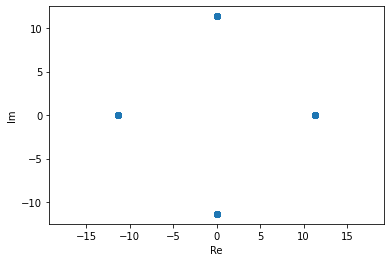

In [ ]:
N = 129
F = linalg.dft(N)
spec = np.linalg.eig(F)[0] # the eigenvalues

plt.plot(spec.real, spec.imag,'o')
plt.xlabel("Re")
plt.ylabel("Im")
plt.axis("equal")
plt.show()

**Exercise:** For which $f$ is $\widehat f$ purely real?

### Relation between discrete and continuous FT

Typical discretizations/sampling:
* Let $f:\mathbb R\to \mathbb R$ be a smooth function, $\lim_{x\to\infty} f(x)=0$. Set

  $$f[k] = f\Big(\frac{c(k-N/2)}{\sqrt{N}}\Big), \quad k=0,\ldots,N,$$
  with some constant $c>0$, then at large $N$
  
  $$\operatorname{DFT}(f) [n]\approx \frac{N}{2}e^{\pi i n}\begin{cases}\operatorname{CFT}(f) \big[\frac{2\pi n}{c\sqrt{N}}\big], & n<\frac{N}{2} \\ \operatorname{CFT}(f) \big[\frac{2\pi (n-N)}{c\sqrt{N}}\big], & n\ge \frac{N}{2}\end{cases}$$

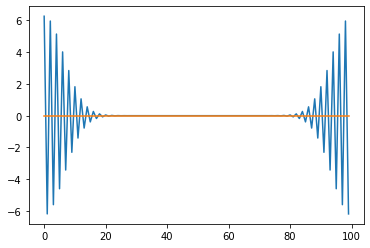

In [ ]:
c = 4.
N = 100
 
x = c*(-N/2+np.arange(N))/np.sqrt(N)

f = np.exp(-x*x/2) 

# CFT(f) = f/sqrt(2\pi)
f_ft = np.fft.fft(f)

plt.plot(f_ft.real)
plt.plot(f_ft.imag)
plt.show()

* **Exercise**: If $f:[0,1]\to \mathbb R$ and we set 

  $$f[k] = f\Big(\frac{k}{N}\Big), \quad k=0,\ldots,N,$$
  
 then DFT approximates the Fouries series expansion of $f$.
  
* **Exercise**: If $f:\mathbb R\to \mathbb R$ and we sample $f[k]=f(c(k-N/2))$, then $f$ can be fully reconstructed from the sampled signal provided $\operatorname{CFT}(f)$ is supported on $[-\frac{\pi}{c}, \frac{\pi}{c}]$ (Nyquist-Shannon-Kotelnikov).

## Fast Fourier Transform

Assuming $N=N_1 N_2$, write $n = N_1n_2+n_1, k=N_2k_1+k_2$ with $0\le n_1,k_1<N_1, 0\le n_2,k_2<N_2$. Then

\begin{align}
\widehat f[N_2k_1+k_2] =& \sum_{n_1=0}^{N_1-1} \sum_{n_2=0}^{N_2-1} f[N_1n_2+n_1] e^{-\frac{2\pi i}{N_1N_2}(N_1n_2+n_1)(N_2k_1+k_2)}\\
= & \sum_{n_1=0}^{N_1-1}\Big[e^{-\frac{2\pi i}{N}n_1k_2}\Big] \bigg(\sum_{n_2=0}^{N_2-1}f[{N_1n_2+n_1}]e^{-\frac{2\pi i}{N_2}n_2k_2}\bigg) e^{-\frac{2\pi i}{N_1}n_1k_1}
\end{align}

The inner sum is $N_1$ computations of DFT of size $N_2$ indexed by $n_1, k_2$, its result is an $N_1\times N_2$ array indexed by $n_1, k_2.$ 

The outer sum is $N_2$ computations of DFT of size $N_1$ indexed by $k_1, k_2$. 

Between them is elementwise multiplication by the $N_1\times N_2$ matrix $e^{-\frac{2\pi i}{N}n_1k_2}$.

So if $C(N)$ is the total number of operations, then

$$C(N) = N_1C(N_2)+O(N)+N_2C(N_1).$$ 

**Exercise:** Show that $C(N)=O(N\log N)$ if $N$ is an integer power of 2.

**Exercise:** Why does `numpy`'s FFT have very different execution times for neighboring values of $N$?

In [ ]:
import time

print ('====== FFT time')
N0 = 1000000
for N in range(N0, N0+5):
    A = np.random.normal(size=(N,))
    t0 = time.time()
    np.fft.fft(A)
    t1 = time.time()
    print ('N = %d; FFT time: %f' %(N, t1-t0))

====== FFT time
N = 1000000; FFT time: 0.043614
N = 1000001; FFT time: 0.338959
N = 1000002; FFT time: 0.341373
N = 1000003; FFT time: 0.338228
N = 1000004; FFT time: 0.154680


In [ ]:
import time

def factorize(N):
    if N == 1:
        return []
    for n in range(2,int(np.sqrt(N))+1):
        if N%n == 0:
            return [n]+factorize(N//n)
    return [N]

N0 = 1000000
for N in range(N0, N0+5):
    A = np.random.normal(size=(N,))
    t0 = time.time()
    np.fft.fft(A)
    t1 = time.time()
    factors = factorize(N)
    assert np.prod(factors) == N
    print ('N = %d; FFT time: %f; factors: %s' %(N, t1-t0, str(factors)))

N = 1000000; FFT time: 0.045854; factors: [2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5]
N = 1000001; FFT time: 0.331418; factors: [101, 9901]
N = 1000002; FFT time: 0.335288; factors: [2, 3, 166667]
N = 1000003; FFT time: 0.336804; factors: [1000003]
N = 1000004; FFT time: 0.149206; factors: [2, 2, 53, 53, 89]


**Exercise:** Show that two $n$-digit numbers can be multiplied using $O(n^{\log_ 2 ⁡ 3})$(i.e, approximately $O(n^{1.585}))$ elementary operations (Karatsuba's algorithm). Implement a program performing such a multiplication for two integers of arbitrary length, stored as binary arrays.

## Discrete convolution via FFT

Discrete convolution:
$$(f*g)[n]=\sum_{k\in\mathbb Z}f[k]g[n-k].$$
Here, $k$ runs over $\mathbb Z$ or over $\mathbb Z_N = \mathbb Z/(N\mathbb Z)=\{0,1,\ldots,N-1\}.$

**Exercise:** Prove that if a *linear* operator $L$ acting on sequences on $\mathbb Z_N$ is *translation invariant* (e.g., $(Lf_k)[n] = (Lf)[n-k]$, where $f_k[n] = f[n-k]$), then it is a convolution operator: $Lf = f*g$ for some $g$.

The direct computation of convolution requires $O(N^2)$ operations. But $$\widehat{f*g}=\widehat{f}\cdot\widehat{g},$$
so computing convolution by $f*g=(\widehat{f}\cdot\widehat{g})^\vee$ requires only $O(N\log N)$ operations for good $N$.

**Example: denoising a signal.** Let $$f[n] = g[n]+\epsilon\xi_n,$$ 

where $\xi_n\sim \mathcal N(0,1)$ are i.i.d random variables (the noise). We estimate $g$ from $f$ by convolving $f$ with a smoothing kernel $h$ (for example, $h[n]=\frac{1}{2M+1}\mathbb 1_{[-M,M]}$).

RMS reconstruction error: 0.014265099024852774
Reconstruction time: 0.0007445812225341797


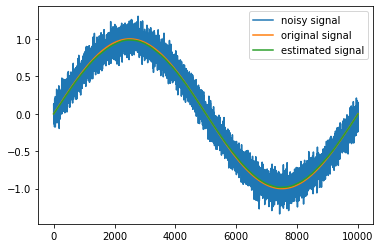

In [ ]:
N = 10000
g = np.sin(2*np.pi*np.linspace(0,1,N)) # original signal
xi = np.random.normal(size=(N,)) 
epsilon = 1e-1
f = g+epsilon*xi # noisy signal

M = 1000
h0 = np.ones((M,))
h0 /= np.sum(h0) # smoothing kernel is 
# embed h0 in Z_N
h = np.zeros((N,))
h[:M//2] = h0[M//2:]
h[-M//2:] = h0[:M//2]

t0 = time.time()
f_fft = np.fft.fft(f)
h_fft = np.fft.fft(h)
g_estimated = np.fft.ifft(f_fft*h_fft)
t1 = time.time()
print ('RMS reconstruction error:', np.linalg.norm(g_estimated-g)/np.sqrt(N))
print ('Reconstruction time:', t1-t0)

plt.plot(f, label='noisy signal')
plt.plot(g, label='original signal')
plt.plot(np.real(g_estimated), label='estimated signal')
plt.legend()
plt.show()

**Exercise:** Estimate theoretically the optimal size $M$ of the kernel $h$ in this example (kernels with larger $M$ better eliminate the noise, but have worse localization) and check the result by a numerical experiment. 

## FT in higher dimensions

Continuous:

$$\widehat f(\mathbf p)=\int_{\mathbb R^d} f(\mathbf x)e^{-i\mathbf p\cdot \mathbf x} d\mathbf x.$$

Discrete, for an array of size $N_1\times\ldots \times N_d$:

$$\widehat f[k_1,\ldots,k_d]=\sum_{n_1=0}^{N_1-1}\ldots\sum_{n_d=0}^{N_d-1} e^{-2\pi i\sum_{q=1}^d\frac{k_s n_s}{N_s}} f[n_1,\ldots,n_d], \quad k_s\in \{0,1,\ldots N_s-1\}.$$

**Exercise:** How fast is FFT applied to an array of size $N_1\times\ldots \times N_d$? 

### Example: denoising an image

Text(0.5, 1.0, 'denoised')

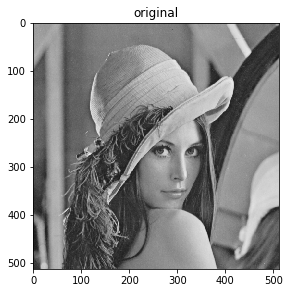

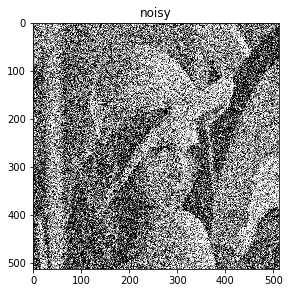

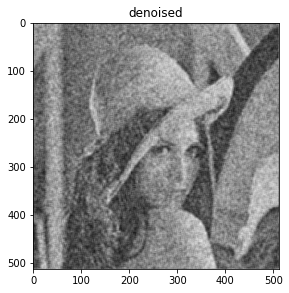

In [ ]:
from skimage import io
pic = io.imread('https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif')
plt.figure()
io.imshow(pic)
plt.title('original')

epsilon = 100
pic_noisy = pic+epsilon*np.random.normal(size=pic.shape)
pic_noisy = np.clip(pic_noisy, 0, 255).astype('uint8')
plt.figure()
io.imshow(pic_noisy)
plt.title('noisy')

M = 6
a = 1./(M*M)
h = np.zeros(pic.shape)
h[:M//2,:M//2] = a
h[-M//2:,:M//2] = a
h[:M//2,-M//2:] = a
h[-M//2:,-M//2:] = a
assert np.sum(h) == 1.

pic_noisy_fft = np.fft.fft2(pic_noisy)
h_fft = np.fft.fft2(h)
pic_denoised_fft = pic_noisy_fft*h_fft
pic_denoised = np.fft.ifft2(pic_denoised_fft).real.astype('uint8')
plt.figure()
io.imshow(pic_denoised)
plt.title('denoised')

**Exercise:** If the kernel $h$ has a very small support, then performing convolution directly should be faster than using FFT. Estimate the size of $h$'s support when the direct mode starts to be faster than FFT.

## Uncertainty Principle

Norm:
$$\|f\|^2 = \int_{-\infty}^\infty |f(x)|^2dx=\frac{1}{2\pi}\int_{-\infty}^\infty |\widehat f(p)|^2dp$$
Mean time (position):
$$\langle x\rangle_f = \frac{1}{\|f\|^2} \int_{-\infty}^\infty x|f(x)|^2dx$$
Time (position) variance:
$$\sigma^2_x=\langle (x-\langle x\rangle)^2\rangle_f=\frac{1}{\|f\|^2} \int_{-\infty}^\infty (x-\langle x\rangle_f)^2|f(x)|^2dx$$
Mean frequency (momentum):
$$\langle p\rangle_f = \frac{1}{2\pi\|f\|^2} \int_{-\infty}^\infty p|\widehat f(p)|^2dp$$
Frequency (momentum) variance:
$$\sigma^2_p=\langle (p-\langle p\rangle_f)^2\rangle_f=\frac{1}{2\pi\|f\|^2} \int_{-\infty}^\infty (p-\langle p\rangle_f)^2|\widehat f(p)|^2dp$$
**Theorem (UP):** For any $f\ne 0,$ $$\sigma^2_x\sigma^2_p\ge \frac{1}{4},$$
and equality only hold for Gaussians shifted in time and frequency:
\begin{align}
f(x) =& ae^{ip_0x}e^{-b(x-x_0)^2}\\
\widehat{f}(p) =& \sqrt{\pi}e^{ix_0p}a e^{-\frac{(p-p_0)^2}{4b}}
\end{align}

*"A signal cannot be localized both in time and frequency"*

**Sketch of proof.** Assume WLOG that $\langle x\rangle_f = \langle p\rangle_f=0$ and $\|f\|=1$ (can be ensured by rescaling and shifting $f$ in the original and frequency domain). Then  

$$\sigma^2_x=\langle x^2\rangle_f=\| Xf\|^2,$$
$$\sigma^2_p=\langle p^2\rangle_f=\big\| \tfrac{d}{dx}f\big\|^2,$$

where $(Xf)(x)=xf(x).$ Then, using canonical commutation relation $\big[\tfrac{d}{dx},X\big]=1,$

$$1=\|f\|^2=\big\|\big[\tfrac{d}{dx},X\big]f\big\|^2=\big\langle f, \big(\tfrac{d}{dx}X-X\tfrac{d}{dx}\big)f\big\rangle_{L^2}\le 2\big|\big\langle Xf, \tfrac{d}{dx} f\big\rangle_{L^2}\big|\le 2\big\| Xf\big\|\big\|\tfrac{d}{dx} f\big\|.$$

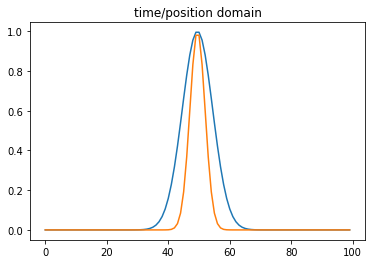

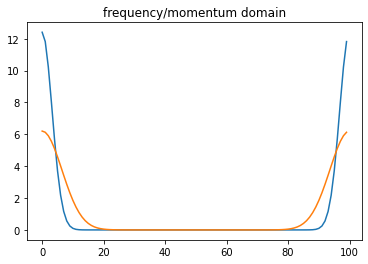

In [ ]:
N = 100
B = [0.5, 2]
x = np.linspace(-np.sqrt(N), np.sqrt(N), N)
for b in B:
    f = np.exp(-b*x**2)
    f_fft = np.fft.fft(f)
    plt.figure(1)
    plt.plot(f)
    plt.title('time/position domain')
    plt.figure(2)
    plt.plot(np.abs(f_fft))
    plt.title('frequency/momentum domain')

## Short time Fourier transform
### Continuous case
Fix a real function $g$ such that $g(-x)=g(x)$ and $\|g\|=1$. For any numbers $u,p$ define the shift of $g$ by $u$ in time and by $p$ in frequency:
$$g_{u,p}(x) = e^{ipx}g(x-u).$$
**STFT** of $f$:
$$Sf(u,p)=\langle f, g_{u,p}\rangle = \int_{-\infty}^\infty f(x) g(x-u)e^{-ipx}dx.$$
**Spectrogram:**
$$P_Sf(u,p)=|Sf(u,p)|^2.$$
**Inversion theorem:**
$$f(x)=\frac{1}{2\pi}\int_{-\infty}^\infty\int_{-\infty}^\infty Sf(u,p)g(x-u)e^{ipx}dudp$$
and
$$\int_{-\infty}^\infty |f(x)|^2dx = \frac{1}{2\pi}\int_{-\infty}^\infty\int_{-\infty}^\infty |Sf(u,p)|^2dudp$$

### Discrete case (similar)
**STFT** of $f$:
$$Sf[m,l]=\sum_{n=0}^{N-1} f[m]g[m-n]e^{-\frac{2\pi i lm}{N}}.$$
**Inversion theorem:**
$$f[x]=\frac{1}{N}\sum_{m=0}^{N-1}\sum_{m=0}^{N-1} Sf[m,l]g[n-m]e^{\frac{2\pi iln}{N}}$$
and 
$$\sum_{n=0}^{N-1}|f[n]|^2=\frac{1}{N}\sum_{m=0}^{N-1}\sum_{l=0}^{N-1}|Sf[m,l]|^2.$$

Text(0.5, 1.0, 'Toeplitz matrix (matrix of convolution with g)')

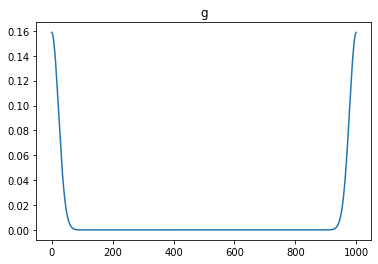

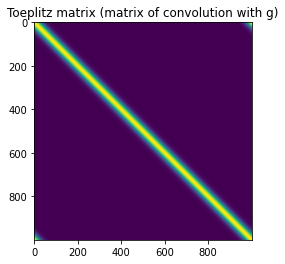

In [ ]:
N = 1000
# a Gaussian g
x = np.linspace(0, np.sqrt(N), N)
g = np.zeros((N,))
g[:N//2] = np.exp(-x[:N//2]**2)
g[-N//2:] = g[N//2:0:-1]
g /= np.sqrt(np.sum(g*g))
plt.plot(g)
plt.title('g')

from scipy.linalg import toeplitz
t = toeplitz(g)
plt.figure()
plt.imshow(t)
plt.title('Toeplitz matrix (matrix of convolution with g)')

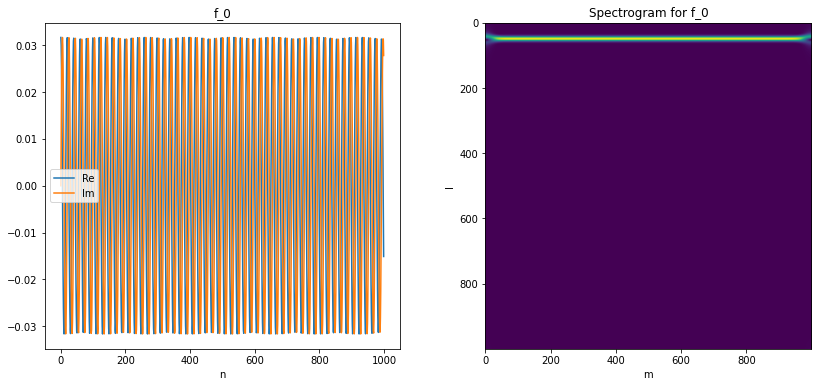

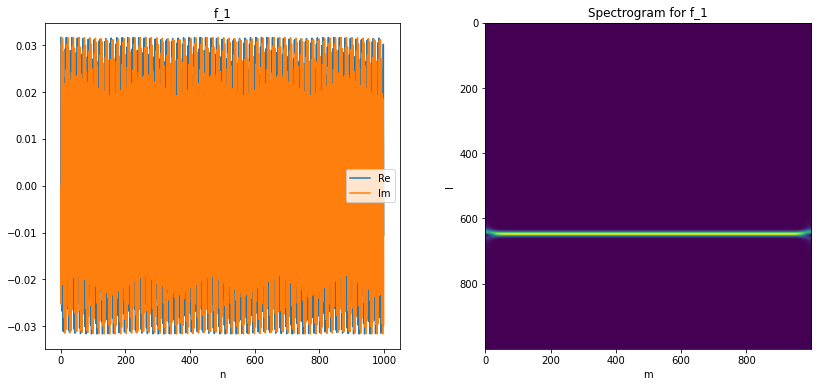

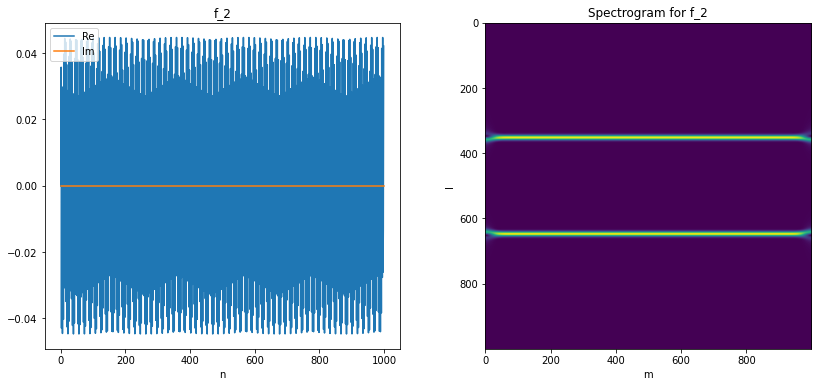

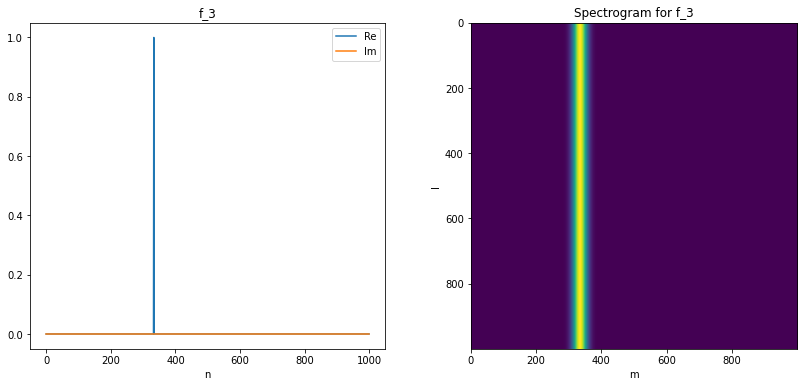

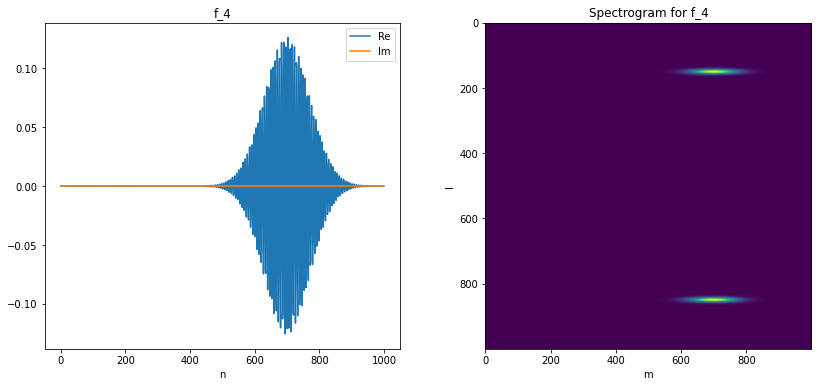

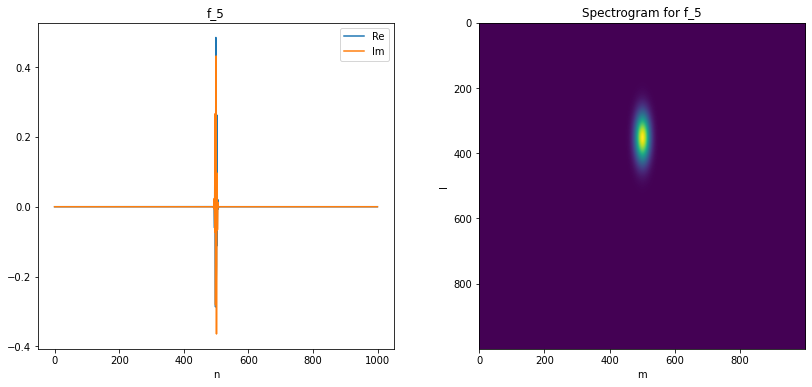

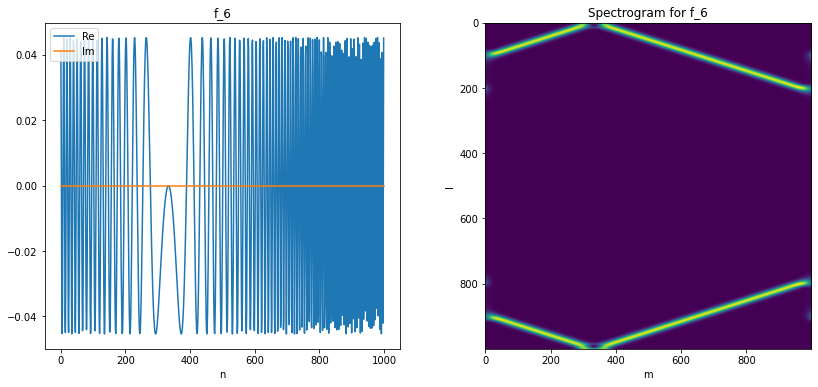

In [ ]:
%matplotlib inline
def get_S(f): # the STFT
    return np.fft.fft(t*f, axis=1)

# test signals
fList = [np.exp(1j*10*x),                                        # f_0
         np.exp(-1j*70*x),                                       # f_1
         np.sin(70*x),                                           # f_2
         (x == x[int(N/3)]).astype('float'),                     # f_3
         np.exp(-1e-1*(x-0.7*np.sqrt(N))**2)*np.sin(30*x),       # f_4
         np.exp(-1e2*(x-0.5*np.sqrt(N))**2)*np.exp(1j*70*x),     # f_5
         np.sin(-(x-np.sqrt(N)/3)**2),                           # f_6
        ]

for k in range(len(fList)):
    f = fList[k]
    f /= np.sqrt(np.sum(f.real**2+f.imag**2))     
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(f.real, label='Re')
    plt.plot(f.imag, label='Im')
    plt.xlabel('n')
    plt.legend()
    plt.title('f_%d' %(k))
    
    S = get_S(f)
    P = S.real**2+S.imag**2
    #plt.figure()
    plt.subplot(1,2,2)
    plt.imshow(P.T)
    plt.xlabel('m')
    plt.ylabel('l')
    plt.title('Spectrogram for f_%d' %(k))

assert np.abs(np.sum(P)/N-1) < 1e-8